Prophet example.

Note: this is **not** fair to Prophet. Prophet defaults to a well defined business cycle: trend, seasonality, day of week, and so on. These are aspects of the finance problems Prophet is designed to solve. They are not aspects of our artificial problem.



## Setting up our example

In [1]:
# set up Python
import numpy as np
import pandas as pd
from prophet import Prophet
import plotnine
from plotnine import *
from nested_model_fns import plot_model_quality

# set plot size
plotnine.options.figure_size = (16, 8)

In [2]:
d_train = pd.read_csv("d_train.csv")
d_test = pd.read_csv("d_test.csv")

## Prophet

### Prophet without external regressors

In [3]:
# https://facebook.github.io/prophet/docs/quick_start.html#python-api
m = Prophet()

In [4]:
test_date = pd.to_datetime("2024-10-30").date()
train_date = test_date - pd.to_timedelta(d_train.shape[0] + 1, unit="days")

In [5]:
d_train_p = pd.DataFrame(
    {
        "ds": [
            train_date + pd.to_timedelta(i, unit="days")
            for i in range(d_train.shape[0])
        ],
        "y": d_train["y"],
    }
)

d_train_p

,ds,y
0,2022-02-22,43.0
1,2022-02-23,63.0
2,2022-02-24,39.0
3,2022-02-25,46.0
4,2022-02-26,59.0
...,...,...
975,2024-10-24,0.0
976,2024-10-25,0.0
977,2024-10-26,0.0
978,2024-10-27,13.0


In [6]:
m.fit(d_train_p)

14:42:45 - cmdstanpy - INFO - Chain [1] start processing
14:42:45 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=d_test.shape[0])
forecast = m.predict(future)

In [8]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-02-22,49.455160,4.435238,84.651140,49.455160,49.455160,-4.007129,-4.007129,-4.007129,0.841963,0.841963,0.841963,-4.849092,-4.849092,-4.849092,0.0,0.0,0.0,45.448031
1,2022-02-23,49.452830,8.512656,88.156778,49.452830,49.452830,-2.165212,-2.165212,-2.165212,0.642190,0.642190,0.642190,-2.807402,-2.807402,-2.807402,0.0,0.0,0.0,47.287618
2,2022-02-24,49.450499,12.653927,89.111655,49.450499,49.450499,0.140621,0.140621,0.140621,0.447680,0.447680,0.447680,-0.307059,-0.307059,-0.307059,0.0,0.0,0.0,49.591121
3,2022-02-25,49.448169,8.822549,92.774642,49.448169,49.448169,2.231786,2.231786,2.231786,-0.334168,-0.334168,-0.334168,2.565954,2.565954,2.565954,0.0,0.0,0.0,51.679955
4,2022-02-26,49.445838,12.575093,93.503321,49.445838,49.445838,4.590155,4.590155,4.590155,-1.124447,-1.124447,-1.124447,5.714602,5.714602,5.714602,0.0,0.0,0.0,54.035994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-11-13,48.512852,40.308507,125.829939,48.512542,48.513149,32.479100,32.479100,32.479100,0.642190,0.642190,0.642190,31.836909,31.836909,31.836909,0.0,0.0,0.0,80.991952
996,2024-11-14,48.512797,41.173603,120.491224,48.512423,48.513150,31.547314,31.547314,31.547314,0.447680,0.447680,0.447680,31.099634,31.099634,31.099634,0.0,0.0,0.0,80.060111
997,2024-11-15,48.512742,38.792739,116.822640,48.512307,48.513197,29.373447,29.373447,29.373447,-0.334168,-0.334168,-0.334168,29.707615,29.707615,29.707615,0.0,0.0,0.0,77.886190
998,2024-11-16,48.512687,38.705625,116.341507,48.512196,48.513240,26.551415,26.551415,26.551415,-1.124447,-1.124447,-1.124447,27.675862,27.675862,27.675862,0.0,0.0,0.0,75.064103


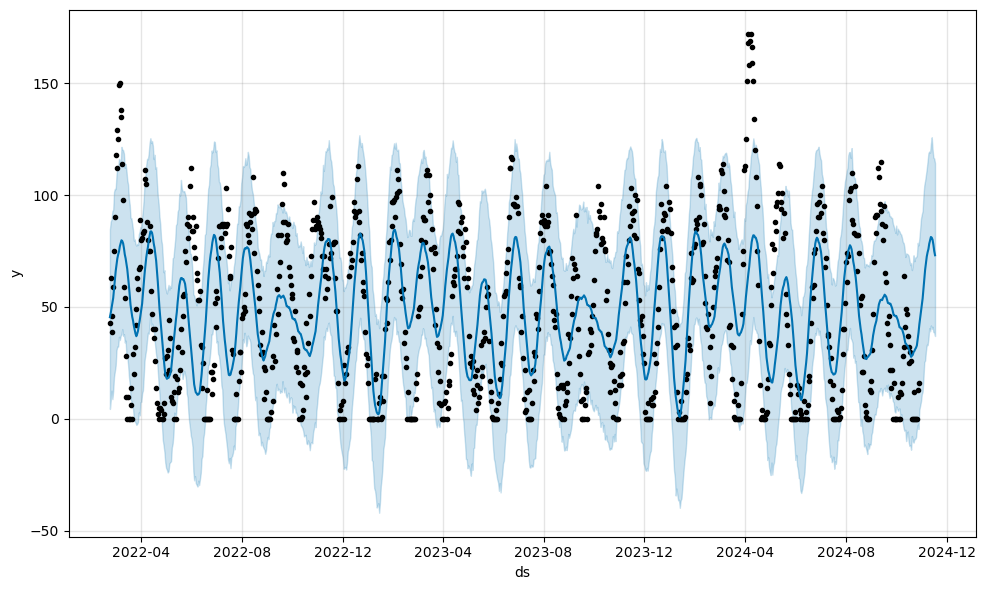

In [9]:
_ = m.plot(forecast)

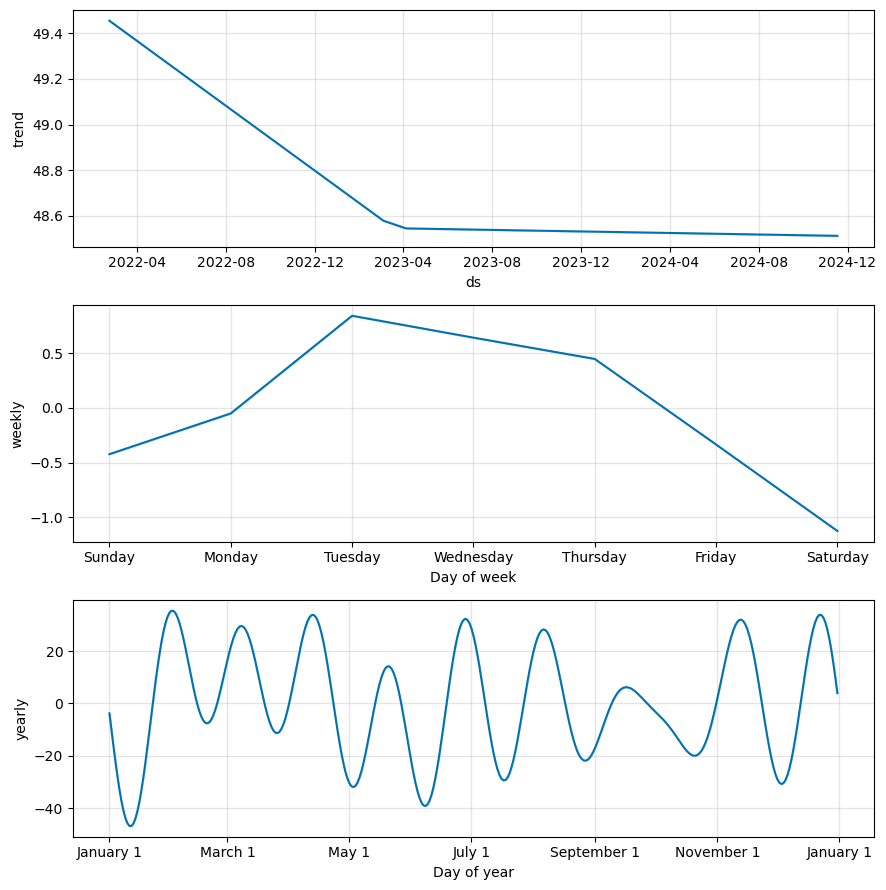

In [10]:
_ = m.plot_components(forecast)

In [11]:
forecast.shape

(1000, 19)

In [12]:
d_train.shape

(980, 5)

In [13]:
d_test.shape

(20, 5)

In [14]:
d_test["Prophet prediction (no external regressors)"] = np.array(
    forecast.loc[range(d_train.shape[0], d_train.shape[0] + d_test.shape[0]), "yhat"]
)

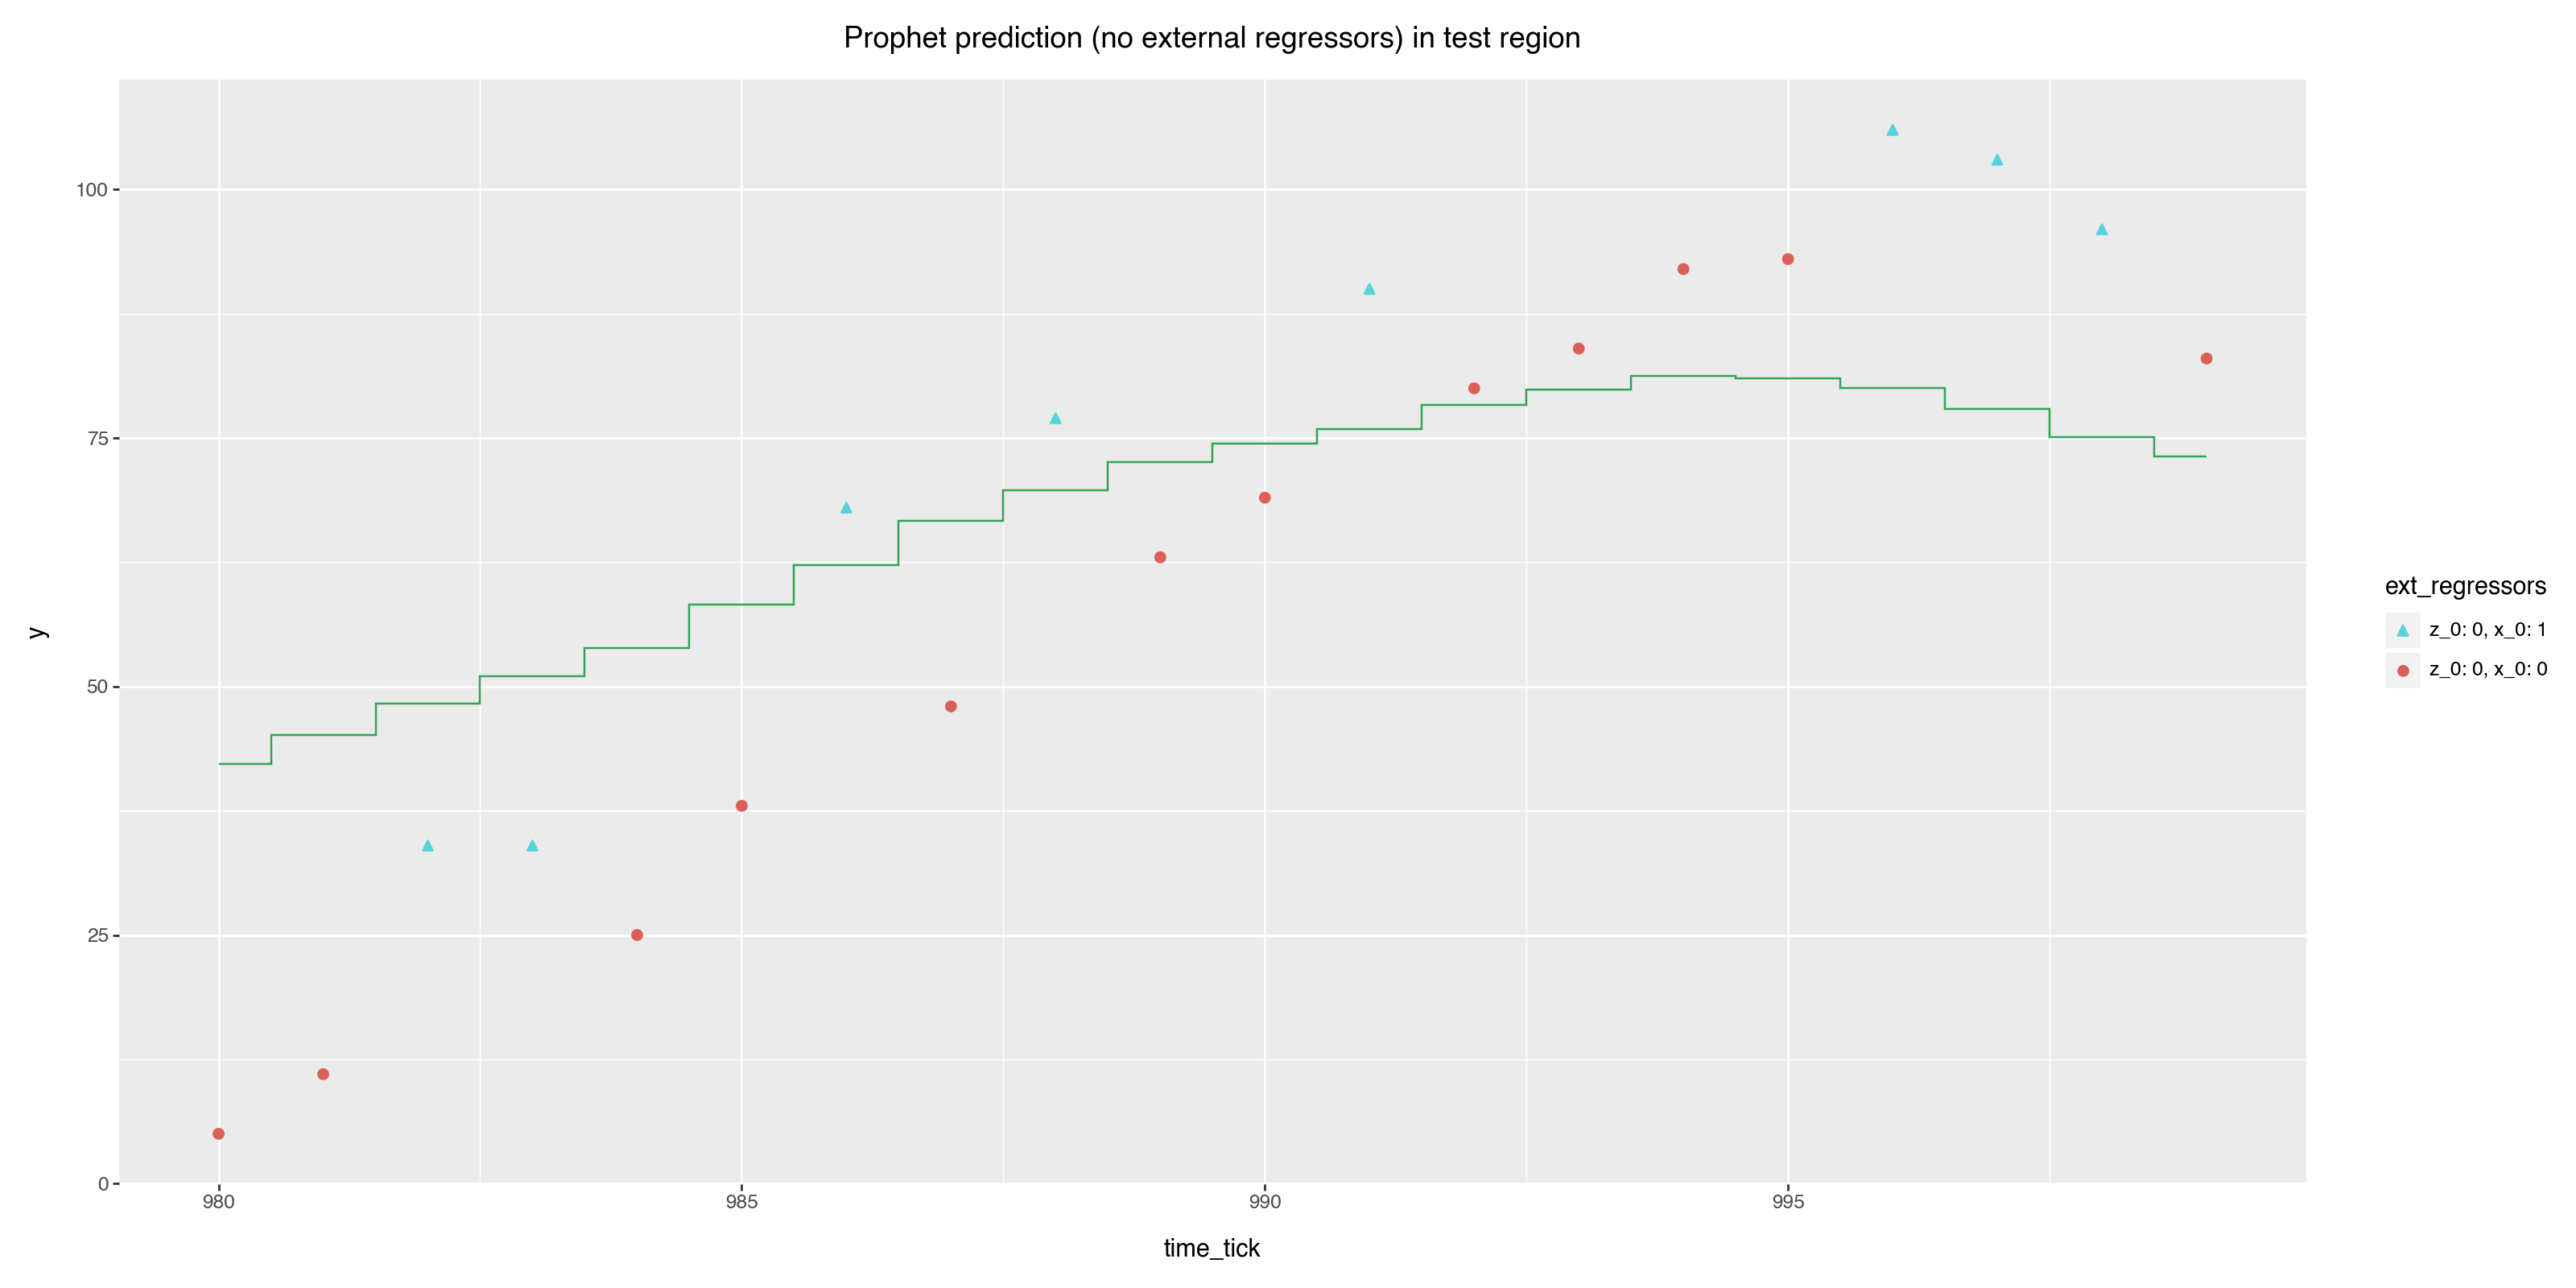

In [15]:
(
    ggplot(
        data=d_test.loc[d_test.notna().all(axis="columns"), :],
        mapping=aes(x="time_tick"),
    )
    + geom_point(
        aes(y="y", shape="ext_regressors", color="ext_regressors"),
        size=2,
    )
    + geom_step(
        aes(y="Prophet prediction (no external regressors)"),
        color="#31a354",
        direction="mid",
    )
    + guides(shape=guide_legend(reverse=True))
    + ggtitle("Prophet prediction (no external regressors) in test region")
)

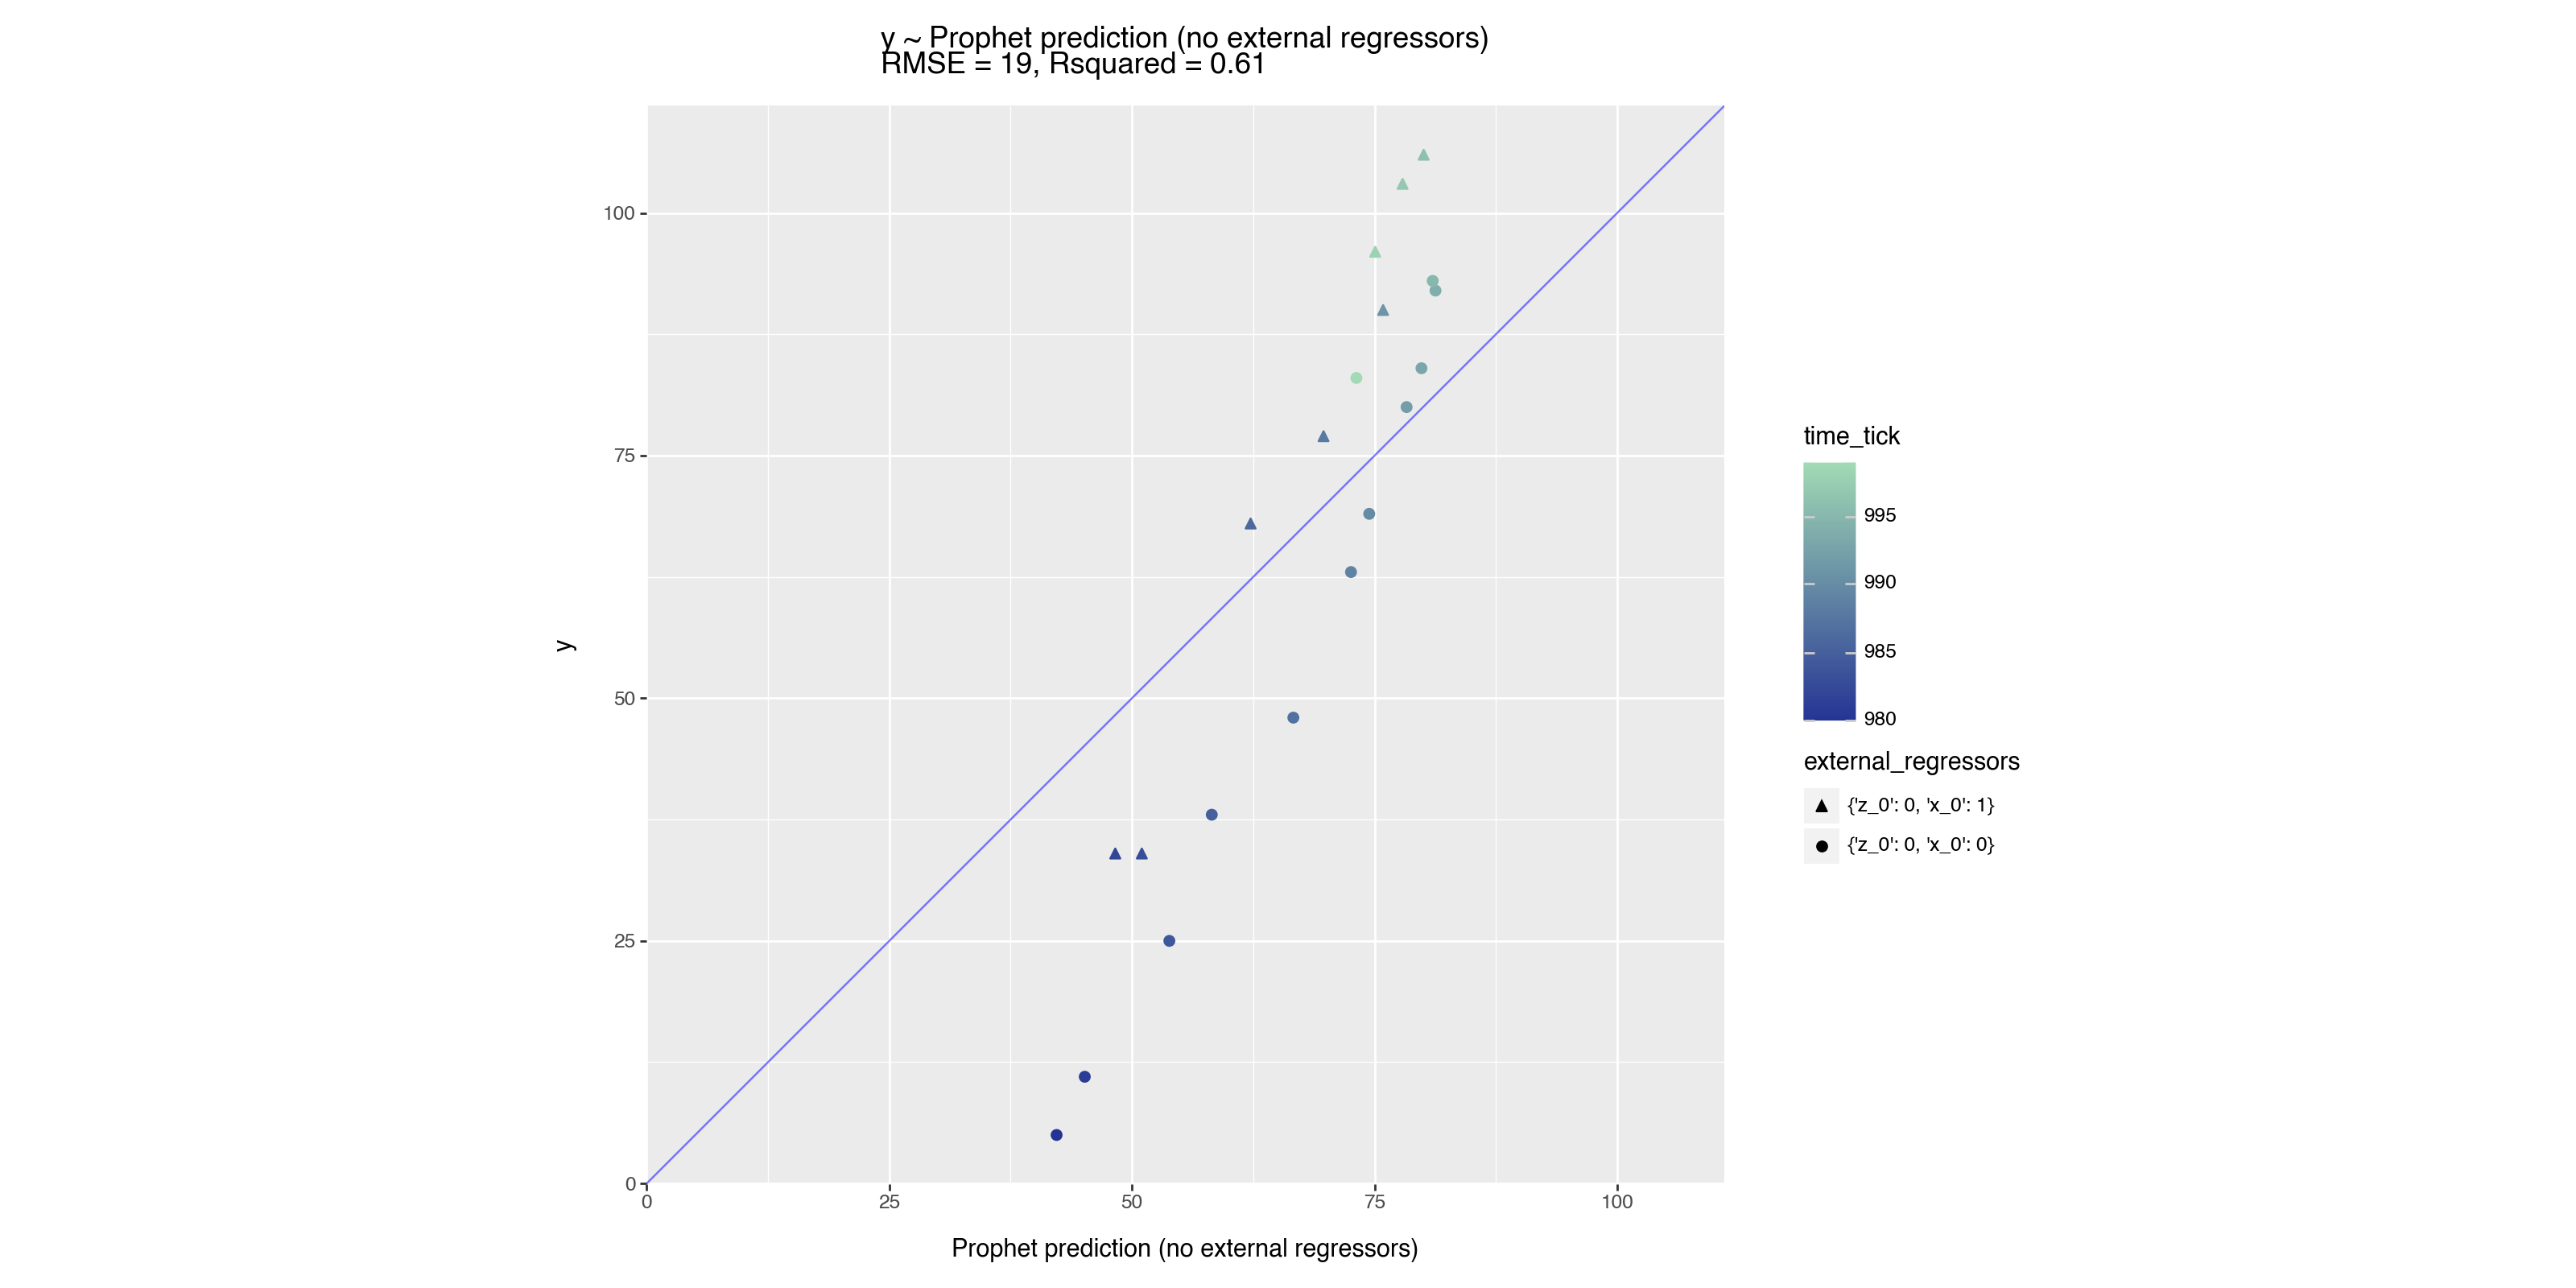

In [16]:
plot_model_quality(
    d_test.loc[
        pd.isnull(d_test["Prophet prediction (no external regressors)"]) == False, :
    ],
    result_name="Prophet prediction (no external regressors)",
    external_regressors=["z_0", "x_0"],
)

### Prophet with external regressors

In [17]:
m_ext = Prophet()
m_ext.add_regressor("z_0")
m_ext.add_regressor("x_0")

In [18]:
test_date = pd.to_datetime("2024-10-30").date()
train_date = test_date - pd.to_timedelta(d_train.shape[0] + 1, unit="days")

In [19]:
d_train_p = pd.DataFrame(
    {
        "ds": [
            train_date + pd.to_timedelta(i, unit="days")
            for i in range(d_train.shape[0])
        ],
        "y": d_train["y"],
        "z_0": d_train["z_0"],
        "x_0": d_train["x_0"],
    }
)

d_train_p

,ds,y,z_0,x_0
0,2022-02-22,43.0,0,0
1,2022-02-23,63.0,0,1
2,2022-02-24,39.0,0,0
3,2022-02-25,46.0,0,0
4,2022-02-26,59.0,1,0
...,...,...,...,...
975,2024-10-24,0.0,0,0
976,2024-10-25,0.0,0,0
977,2024-10-26,0.0,0,0
978,2024-10-27,13.0,0,1


In [20]:
m_ext.fit(d_train_p)

14:42:47 - cmdstanpy - INFO - Chain [1] start processing
14:42:48 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
future_ext = m_ext.make_future_dataframe(periods=d_test.shape[0])
future_ext["z_0"] = pd.concat([d_train["z_0"], d_test["z_0"]], ignore_index=True)
future_ext["x_0"] = pd.concat([d_train["x_0"], d_test["x_0"]], ignore_index=True)

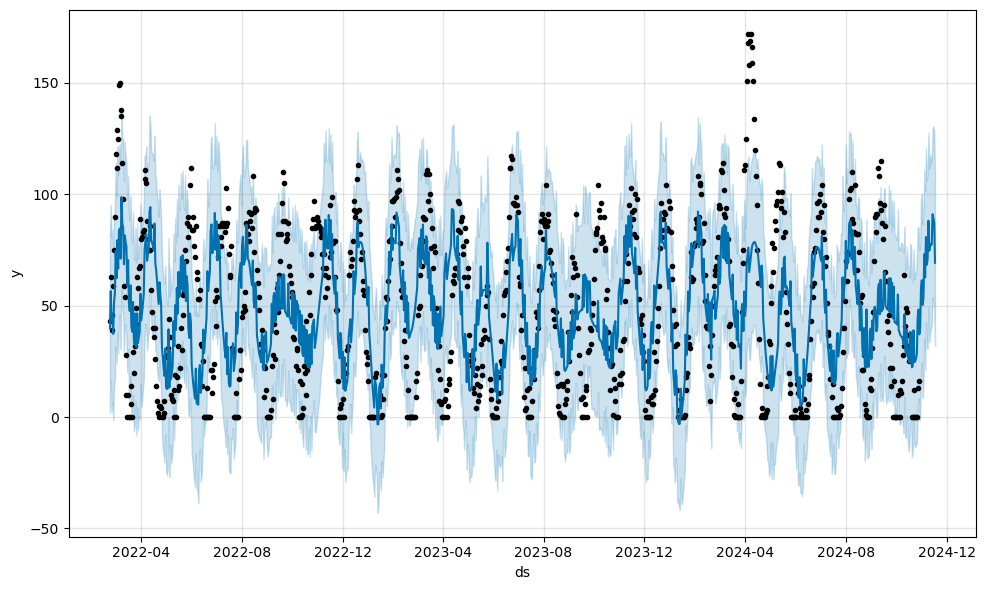

In [22]:
forecast_ext = m_ext.predict(future_ext)
_ = m_ext.plot(forecast_ext)

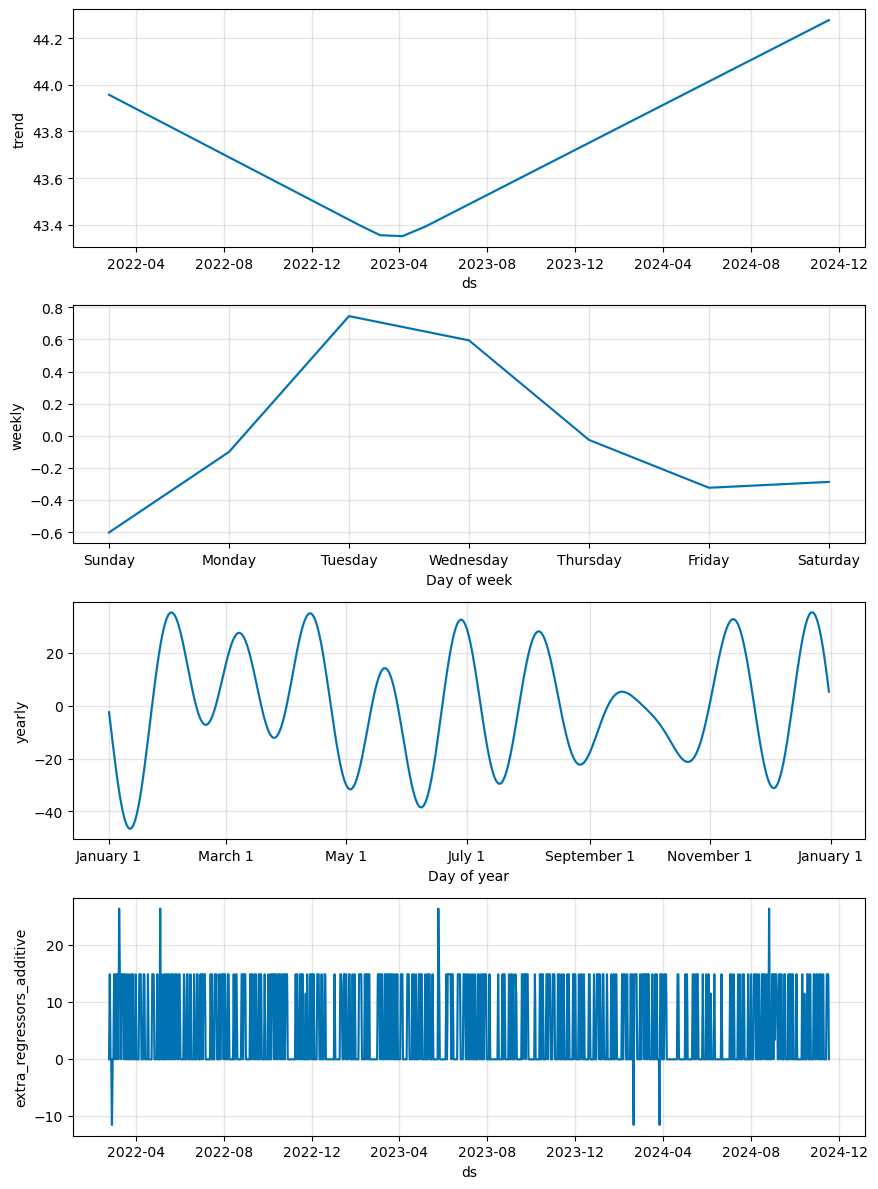

In [23]:
_ = m_ext.plot_components(forecast_ext)

In [24]:
d_test["Prophet prediction (with external regressors)"] = np.array(
    forecast_ext.loc[
        range(d_train.shape[0], d_train.shape[0] + d_test.shape[0]), "yhat"
    ]
)

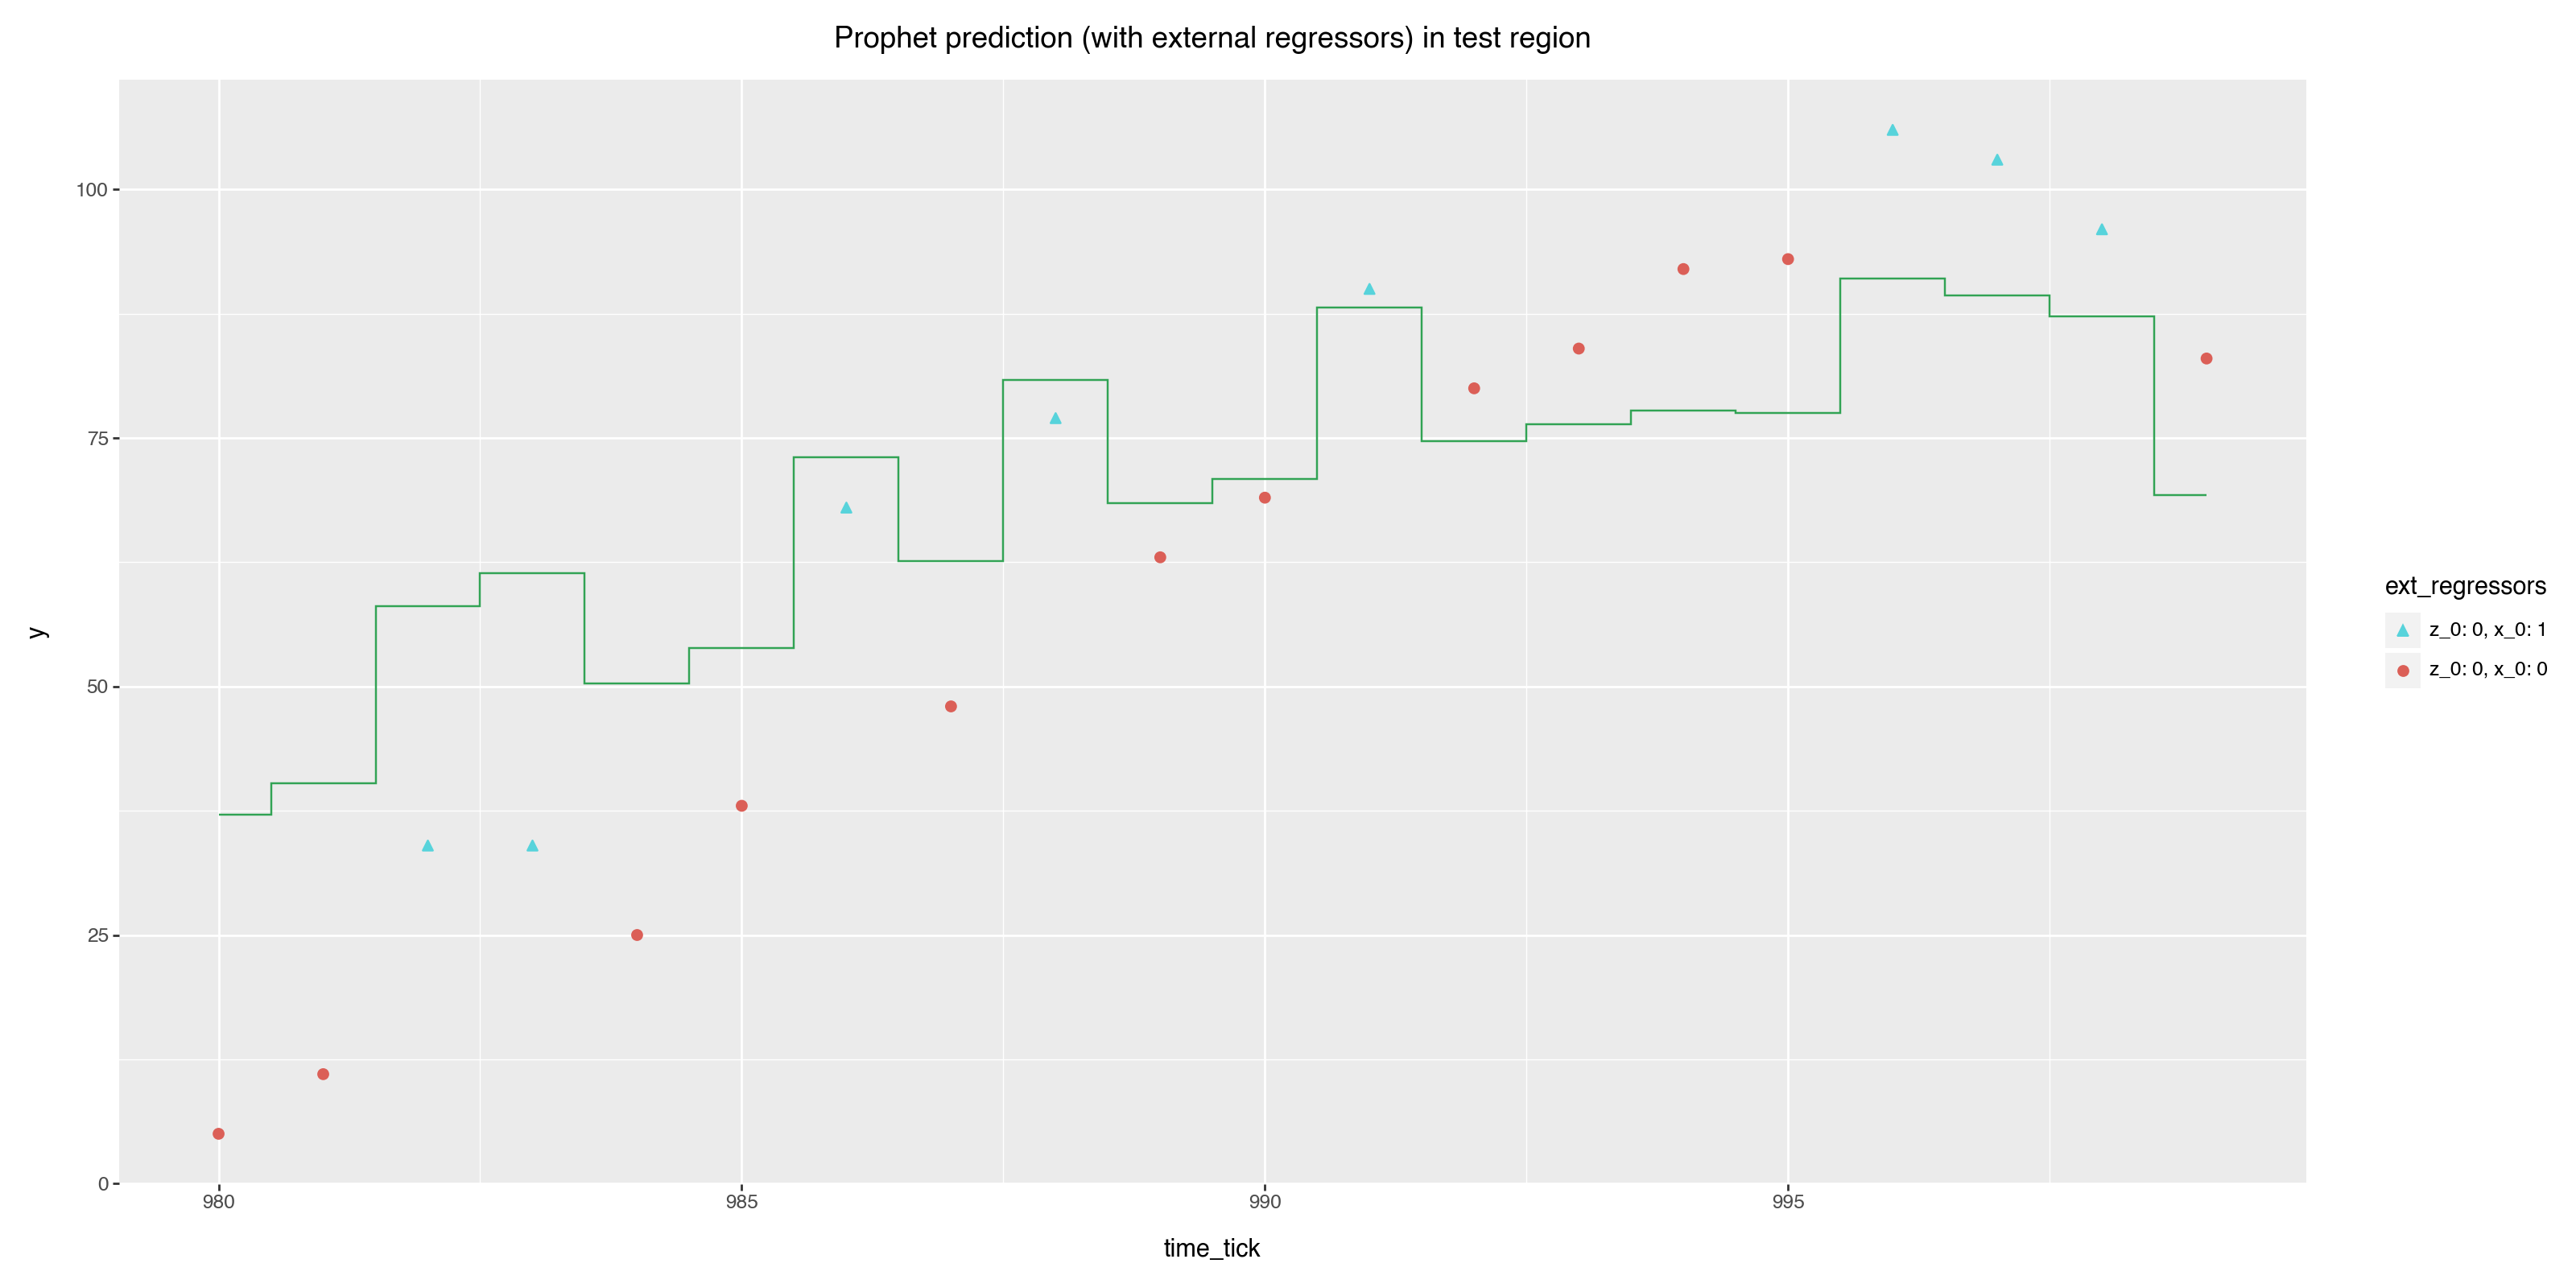

In [25]:
(
    ggplot(
        data=d_test.loc[d_test.notna().all(axis="columns"), :],
        mapping=aes(x="time_tick"),
    )
    + geom_point(
        aes(y="y", shape="ext_regressors", color="ext_regressors"),
        size=2,
    )
    + geom_step(
        aes(y="Prophet prediction (with external regressors)"),
        color="#31a354",
        direction="mid",
    )
    + guides(shape=guide_legend(reverse=True))
    + ggtitle("Prophet prediction (with external regressors) in test region")
)

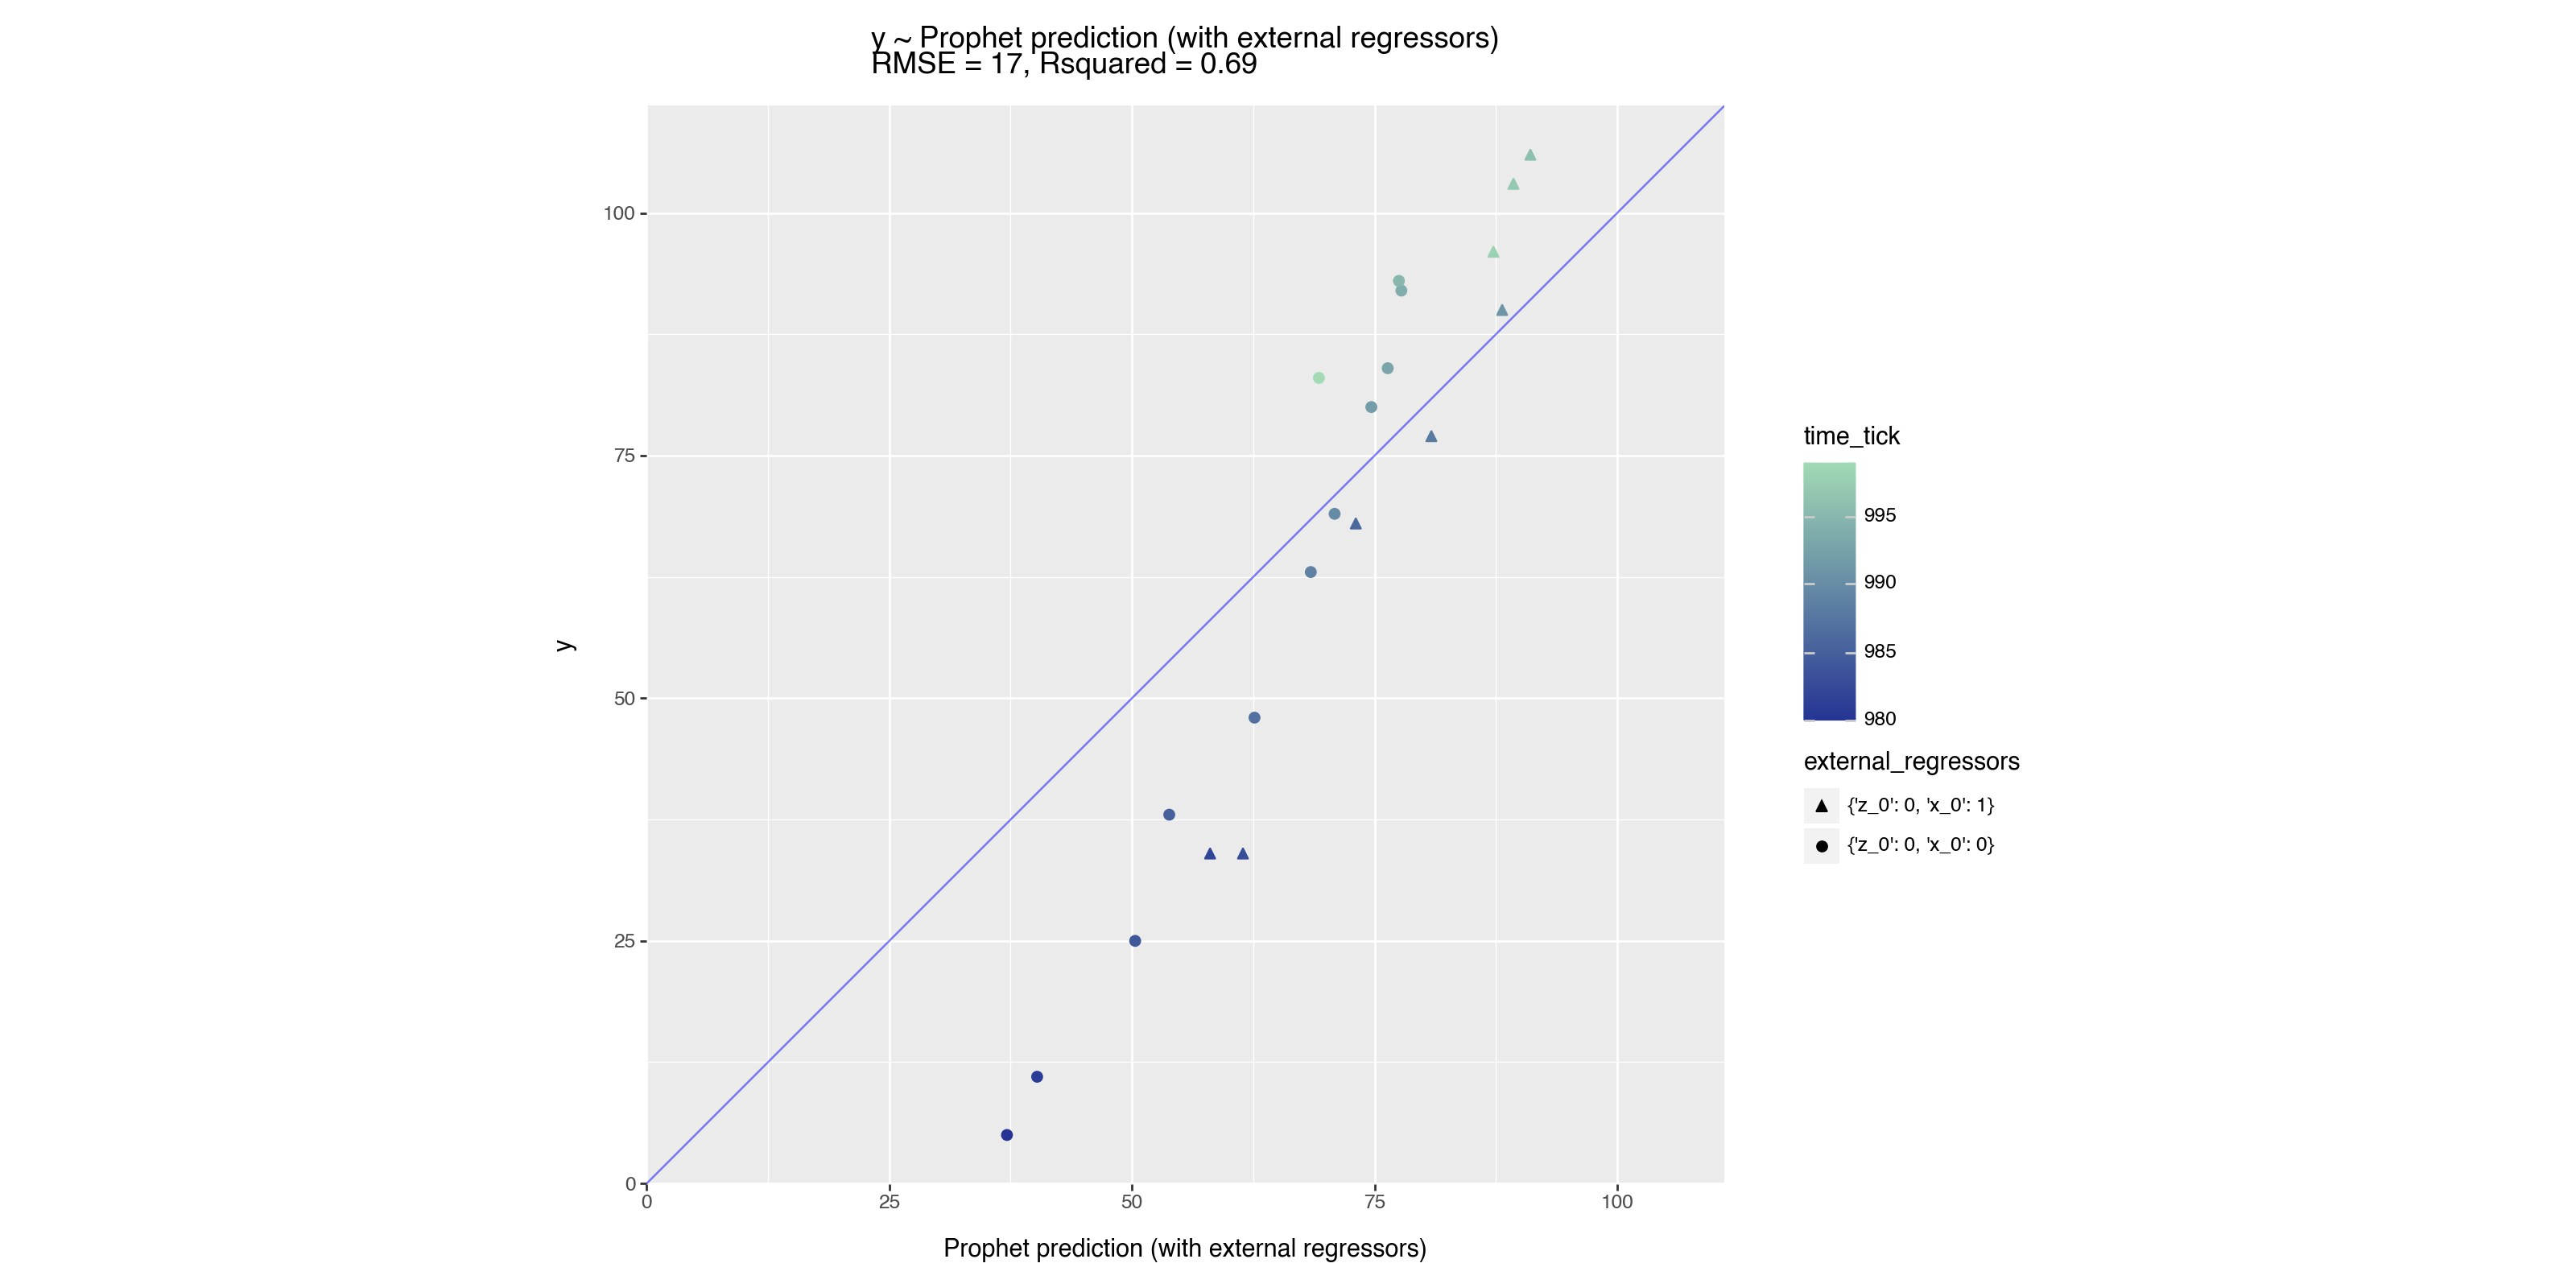

In [26]:
plot_model_quality(
    d_test.loc[
        pd.isnull(d_test["Prophet prediction (with external regressors)"]) == False, :
    ],
    result_name="Prophet prediction (with external regressors)",
    external_regressors=["z_0", "x_0"],
)